---
title: "Clustering"
format:
    html:
        page-layout: full
        code-fold: show
        code-copy: true
        code-tools: true
        code-overflow: wrap
---

## Introduction ##

The feature data in my movie dataset consists of six columns: avg_rating, budget, revenue, runtime, vote_average, and vote_count. Each of these features provides information on different attributes of a list of movies. The “avg_rating” feature represents the average rating given by viewers, indicating an overall reception of the movie. “Budget” and “revenue” features provide insights into the financial capacity and performance of a movie, providing data on production costs and earnings. The “Runtime” feature reflects the duration of the movie, while “vote_average” and “vote_count” features capture user engagement and popularity based on user votes.

Clustering is an insightful technique to discover patterns and similarities within complex datasets. In this project, we’ll work with the following clustering algorithms: KMEAN, DBSAN, and hierarchical clustering. In my clustering analysis, my objective is to group similar movies together based on the feature set. This could provide valuable insights for targeted analysis, such as understanding audience preferences, identifying successful movie profiles, or even optimizing production strategies based on the characteristics of different clusters. 



## Theory ##

### K-Means Clustering: ###

K-Means clustering is a common clustering method used in unsupervised machine learning to group data points through many iterations, assigning them to a “k” number of clusters. The goal of the K-Means process is to uncover patterns within a dataset by clustering datapoints via minimizing the sum of distances from the points to the centroids (or centers) of the clusters. The process is initialized by randomly identifying initial centroids, and then carried out by iteratively assigning points to a cluster and calculating new centroid locations until optimized.

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise): ###

DBSCAN is an algorithm that identifies clusters based on the density levels of data points. Unlike K-Means, “k” number of clusters is not initialized, as DBSCAN aims to determine the optimal number of clusters by analyzing dense spots within the data. The process is carried out by picking out individual points and determining if there are a certain number of neighboring data points to where we can group them into the same cluster. Core points, border points, and noise points are produced by the algorithm to summarize the data points. The initialization of epsilon (radius) and minimum points to place points into clusters are required to run a DBSCAN.

### Heirarchical Clustering: ###

Heirarchical clustering is a method usesd to group similar datapoints into clusters without specifying the number of clusters initially. This algorithm creates a dendrogram (tree-like diagram), which is a heirarchy of clusters that is easy to visualize. There are two approaches to heirarchical clustering: agglomerative a nd divisive. These methods have opposite techniques. The agglomerative way initializes each data point as its own cluster, then merges the data points until one large cluster is formed. The divisive technique starts with a large cluster, and splits it until each data point remains as its own cluster. Heirarchical clustering is an iterative process that requires cutting at a certain point where the optimal number of clusters is reached.

### Elbow and Silhouette Methods ###

The elbow and silhouette methods are common ways of applying K-Means to find the optimal “k” value, aka number of clusters for the model. The objective of the elbow method is to reach the point where adding more clusters is not crucial to the model. The silhouette score is focused on determining the distances of points from neighboring points within clusters, identifying whether or not further clustering should take place. Elbow and silhouette methods are commonly associated with K-Means, but can be applied to various cluster methods.

## Methods ##

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('/Users/samanthamoon/Desktop/DSAN 5000/dsan-5000-project-samjmoon/dsan-website/5000-website/data-cleaning')
movie_df = pd.read_csv('popularity_data_analysis.csv')

In [12]:
#dropping target column "popularity"
feature_df = movie_df.drop(['popularity'], axis=1)
feature_df = feature_df[(feature_df['revenue'] != 0) & (feature_df['budget'] != 0) & (feature_df['runtime'] != 0)]
feature_df.head()
#resulting columns: avg_rating, budget, revenue, runtime, vote_average, vote_count

,avg_rating,budget,revenue,runtime,vote_average,vote_count
0,3.920930,30000000,373554033.0,81.0,7.7,5415.0
1,3.431818,65000000,262797249.0,104.0,6.9,2413.0
3,2.357143,16000000,81452156.0,127.0,6.1,34.0
5,3.946078,60000000,187436818.0,170.0,7.7,1886.0
8,3.125000,35000000,64350171.0,106.0,5.5,174.0


### K-Means ###

In [13]:
#scaling dataset
X = feature_df
scaler = StandardScaler()
X = scaler.fit_transform(X)

/Users/samanthamoon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/samanthamoon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/samanthamoon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/samanthamoon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

Text(0.5, 1.0, 'inertia')

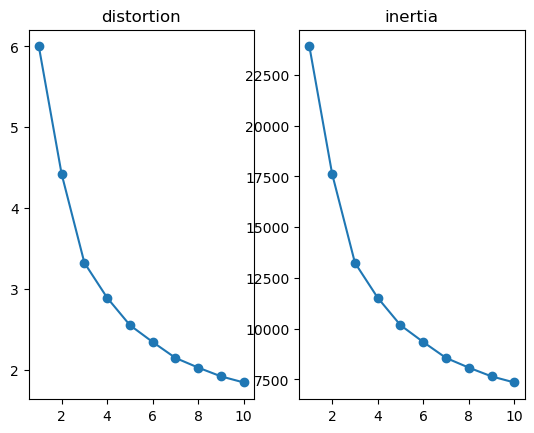

In [14]:
#Elbow Method
distortion = []
inertia = []
cluster = range(1,11)

for k in range(1, 11):
    kmean_model = KMeans(n_clusters = k, init = 'k-means++')
    kmean_model.fit(X)
    inertia.append(kmean_model.inertia_)
    distortion.append(sum(np.square(np.min(cdist(X, kmean_model.cluster_centers_, 'euclidean'), axis = 1))) / X.shape[0])
df = pd.DataFrame({'cluster': cluster, 'distortion': distortion, 'inertia': inertia})
df

#plotting distortion and inertia
fix, ax = plt.subplots(1, 2)
ax[0].plot(df['cluster'], df['distortion'], '-o')
ax[0].set_title('distortion')
ax[1].plot(df['cluster'], df['inertia'], '-o')
ax[1].set_title('inertia')

From the above plots, it is somewhat difficult to determine the optimal number of clusters using the elbow method. Subjectively, I would determine the optimal number of clusters is about 3.

/Users/samanthamoon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 0 ... 0 1 0]


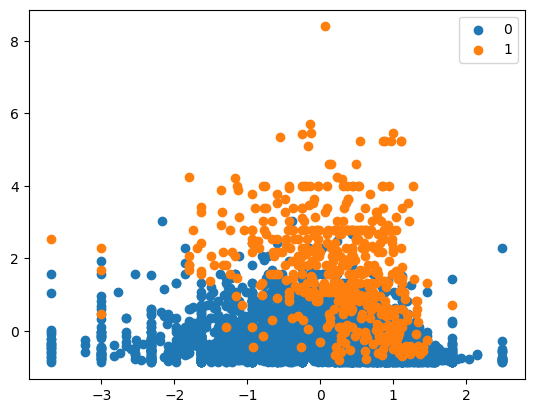

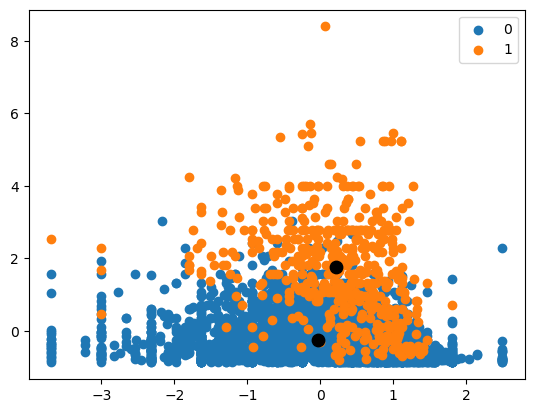

In [15]:
kmeans = KMeans(n_clusters= 2)

#predict the labels of clusters.
label = kmeans.fit_predict(X)
print(label)
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

#getting centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

/Users/samanthamoon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/samanthamoon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/samanthamoon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/samanthamoon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

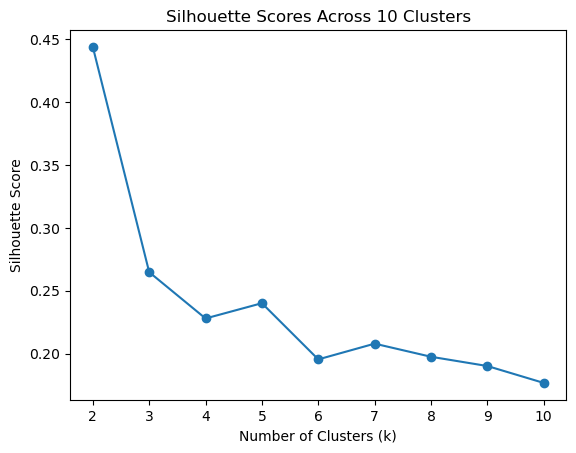

Optimal number of clusters based on Silhouette Score: 2


In [16]:
#Silhouette Method
sil_scores = []

for k in range(2, 11):
    kmeans_model = KMeans(n_clusters=k, init='k-means++')
    labels = kmeans_model.fit_predict(X)
    sil_avg = silhouette_score(X, labels)
    sil_scores.append(sil_avg)

optimal_clusters = sil_scores.index(max(sil_scores)) + 2 

plt.plot(range(2, 11), sil_scores, '-o')
plt.title('Silhouette Scores Across 10 Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

print(f"Optimal number of clusters based on Silhouette Score: {optimal_clusters}")

### DBSCAN ###

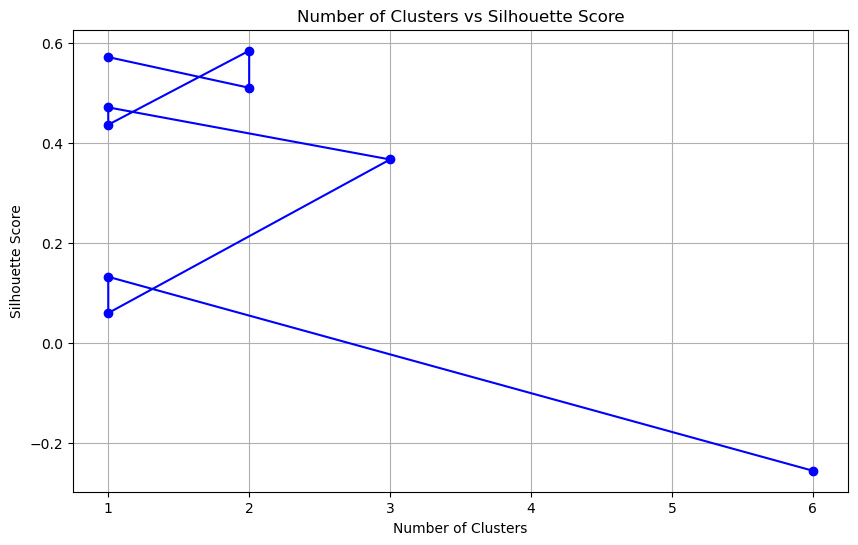

In [17]:
#initialize epsilon values and miniumum points
epsilon_vals = [0.5, 1.0, 1.5]
min_points_vals = [5, 10, 20]

sil_scores = []
num_clusters = []

for i in epsilon_vals:
    for min_points in min_points_vals:
        dbscan_model = DBSCAN(eps=i, min_samples=min_points)
        labels = dbscan_model.fit_predict(X)

        sil_avg = silhouette_score(X, labels)

        num_clusters.append(len(set(labels)) - (1 if -1 in labels else 0))
        sil_scores.append(sil_avg)

#plotting the number of clusters against silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, sil_scores, marker='o', linestyle='-', color='b')
plt.title('Number of Clusters vs Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

From the above plot, we can observe that the optimal number of clusters produced by DBSCAN is 2, since this is where the silhouette score is the highest.

## Heirarchical Clustering ##

/Users/samanthamoon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


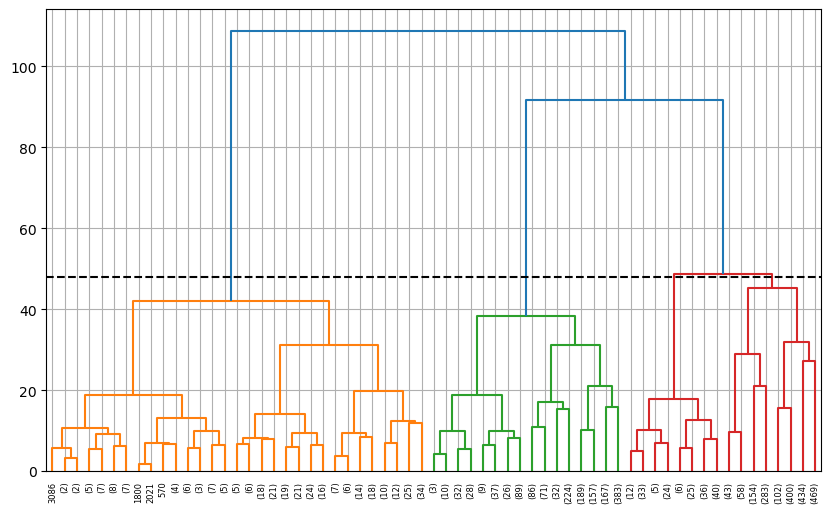

In [18]:
#Aggolmerative Method
ag_model = AgglomerativeClustering(affinity='euclidean', linkage='ward')
labels = ag_model.fit_predict(X)

#creating linkage for agglomerative clustering and the dendrogram for the linkage
l= linkage(X, method='ward', metric='euclidean')
plt.figure(figsize=(10, 6))
dendrogram(l, p=5, truncate_mode='level')
plt.grid()
plt.axhline(y=48, color='black', linestyle='--')
plt.show()


By visualizing the dendrogram, I conclude that the optimal number of clusters is 2 (horizontal line test)

/Users/samanthamoon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/samanthamoon/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


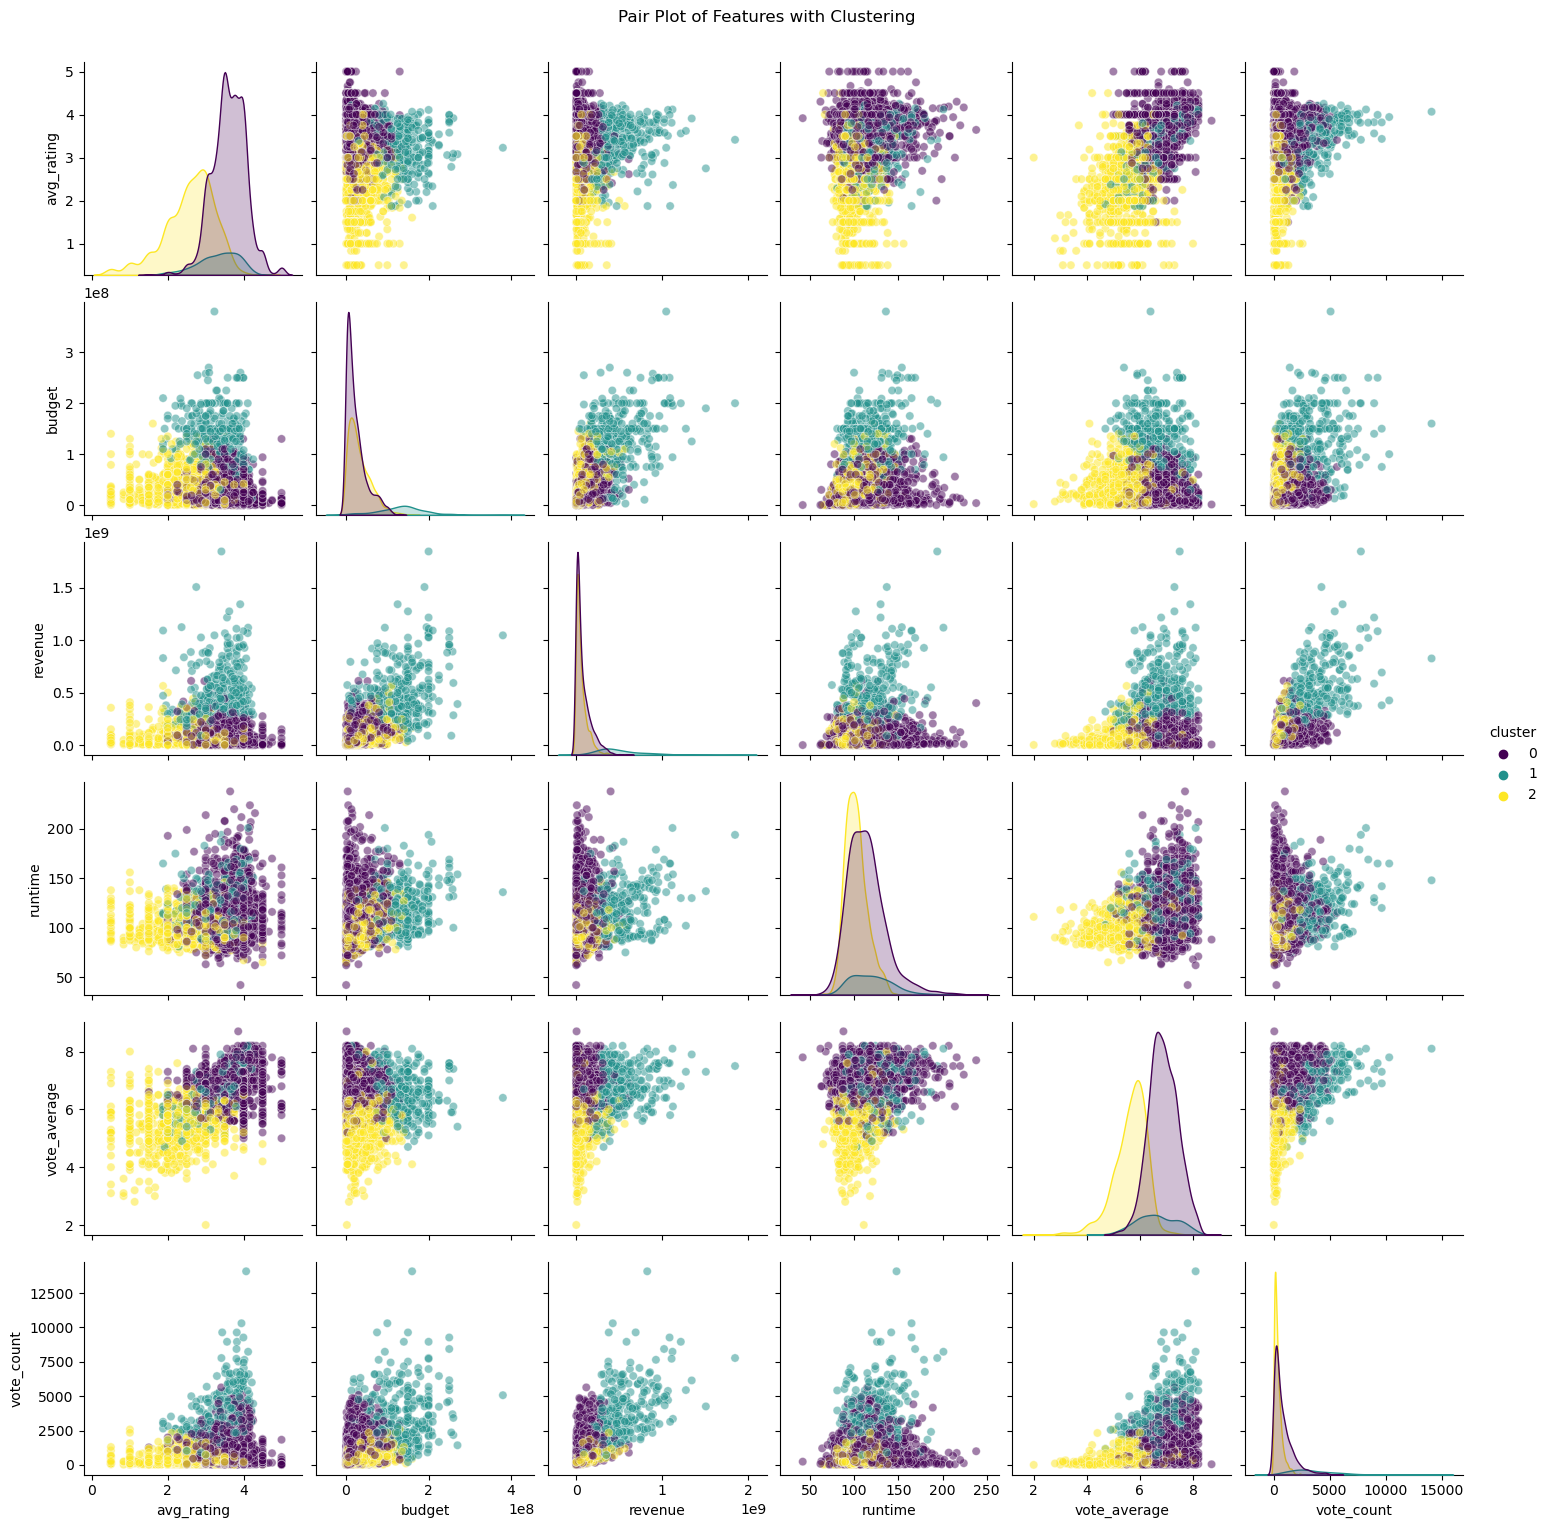

In [19]:
#final results with n_clusters = 3
ag_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = ag_model.fit_predict(X)

feature_df['cluster'] = labels

#visualize clustering across all features
sns.pairplot(feature_df, hue='cluster', palette='viridis', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Features with Clustering', y=1.02)
plt.show()